In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset = "diabetes.csv"

diabetes = pd.read_csv(dataset)

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.shape

(768, 9)

# Examining Data 

1. Since the outcome target is a binary variable we can convert it into a categorical variable too.

2. Many of the variables have a minimum value of zero which cant be true. Hence they account for outliers or error in values. We will fill the values with mean or median.


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
## Checking for duplicated records

diabetes.duplicated().any()

False

In [8]:
## Checking for missing values.

diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Exploratory Data Analysis

In [9]:
df = diabetes.copy()
df["Outcome"] = df["Outcome"].astype("category")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [16]:
num_cols = [x for x in df.columns if df[x].dtypes in ("int64","float64")]
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

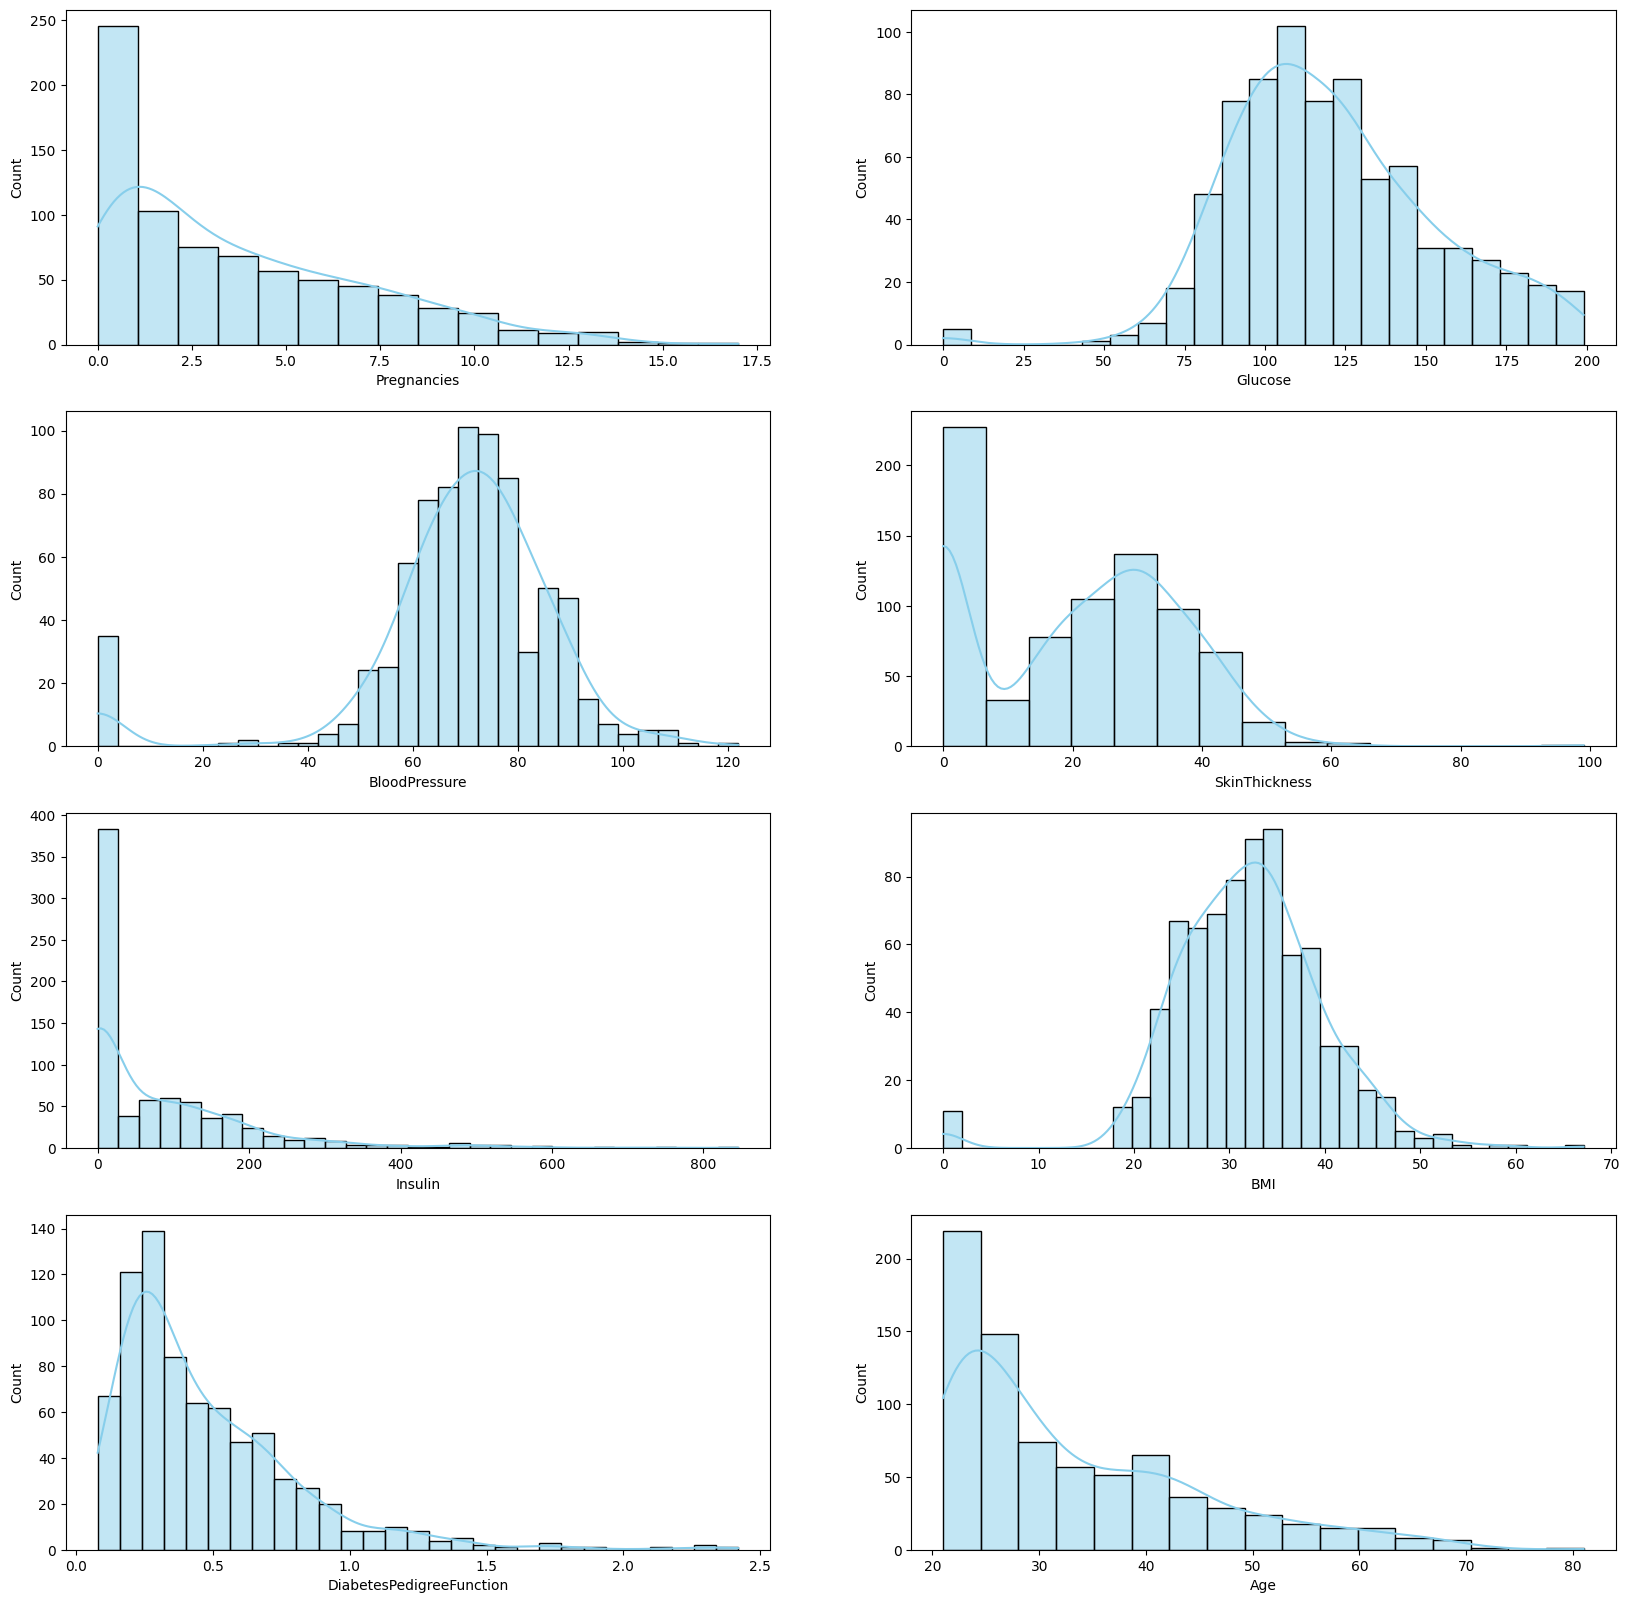

In [18]:
f, axes = plt.subplots(4, 2, figsize=(20, 20))
for ax, feature in zip(axes.flat, num_cols):
    # Check if the feature exists in the DataFrame
    if feature in df.columns:
        sns.histplot(df[feature], color="skyblue", kde=True, ax=ax)
        
    else:
        # Handle the case where the feature is not found in the DataFrame
        ax.axis('off')
        ax.set_title(f"Feature {feature} not found in DataFrame")

**1. Age, Insulin, Pregnancies and Diabetes Pedigree Function are all left skewed data distributions.**

**2. Blood Pressure and Glucose are normally distributed.**

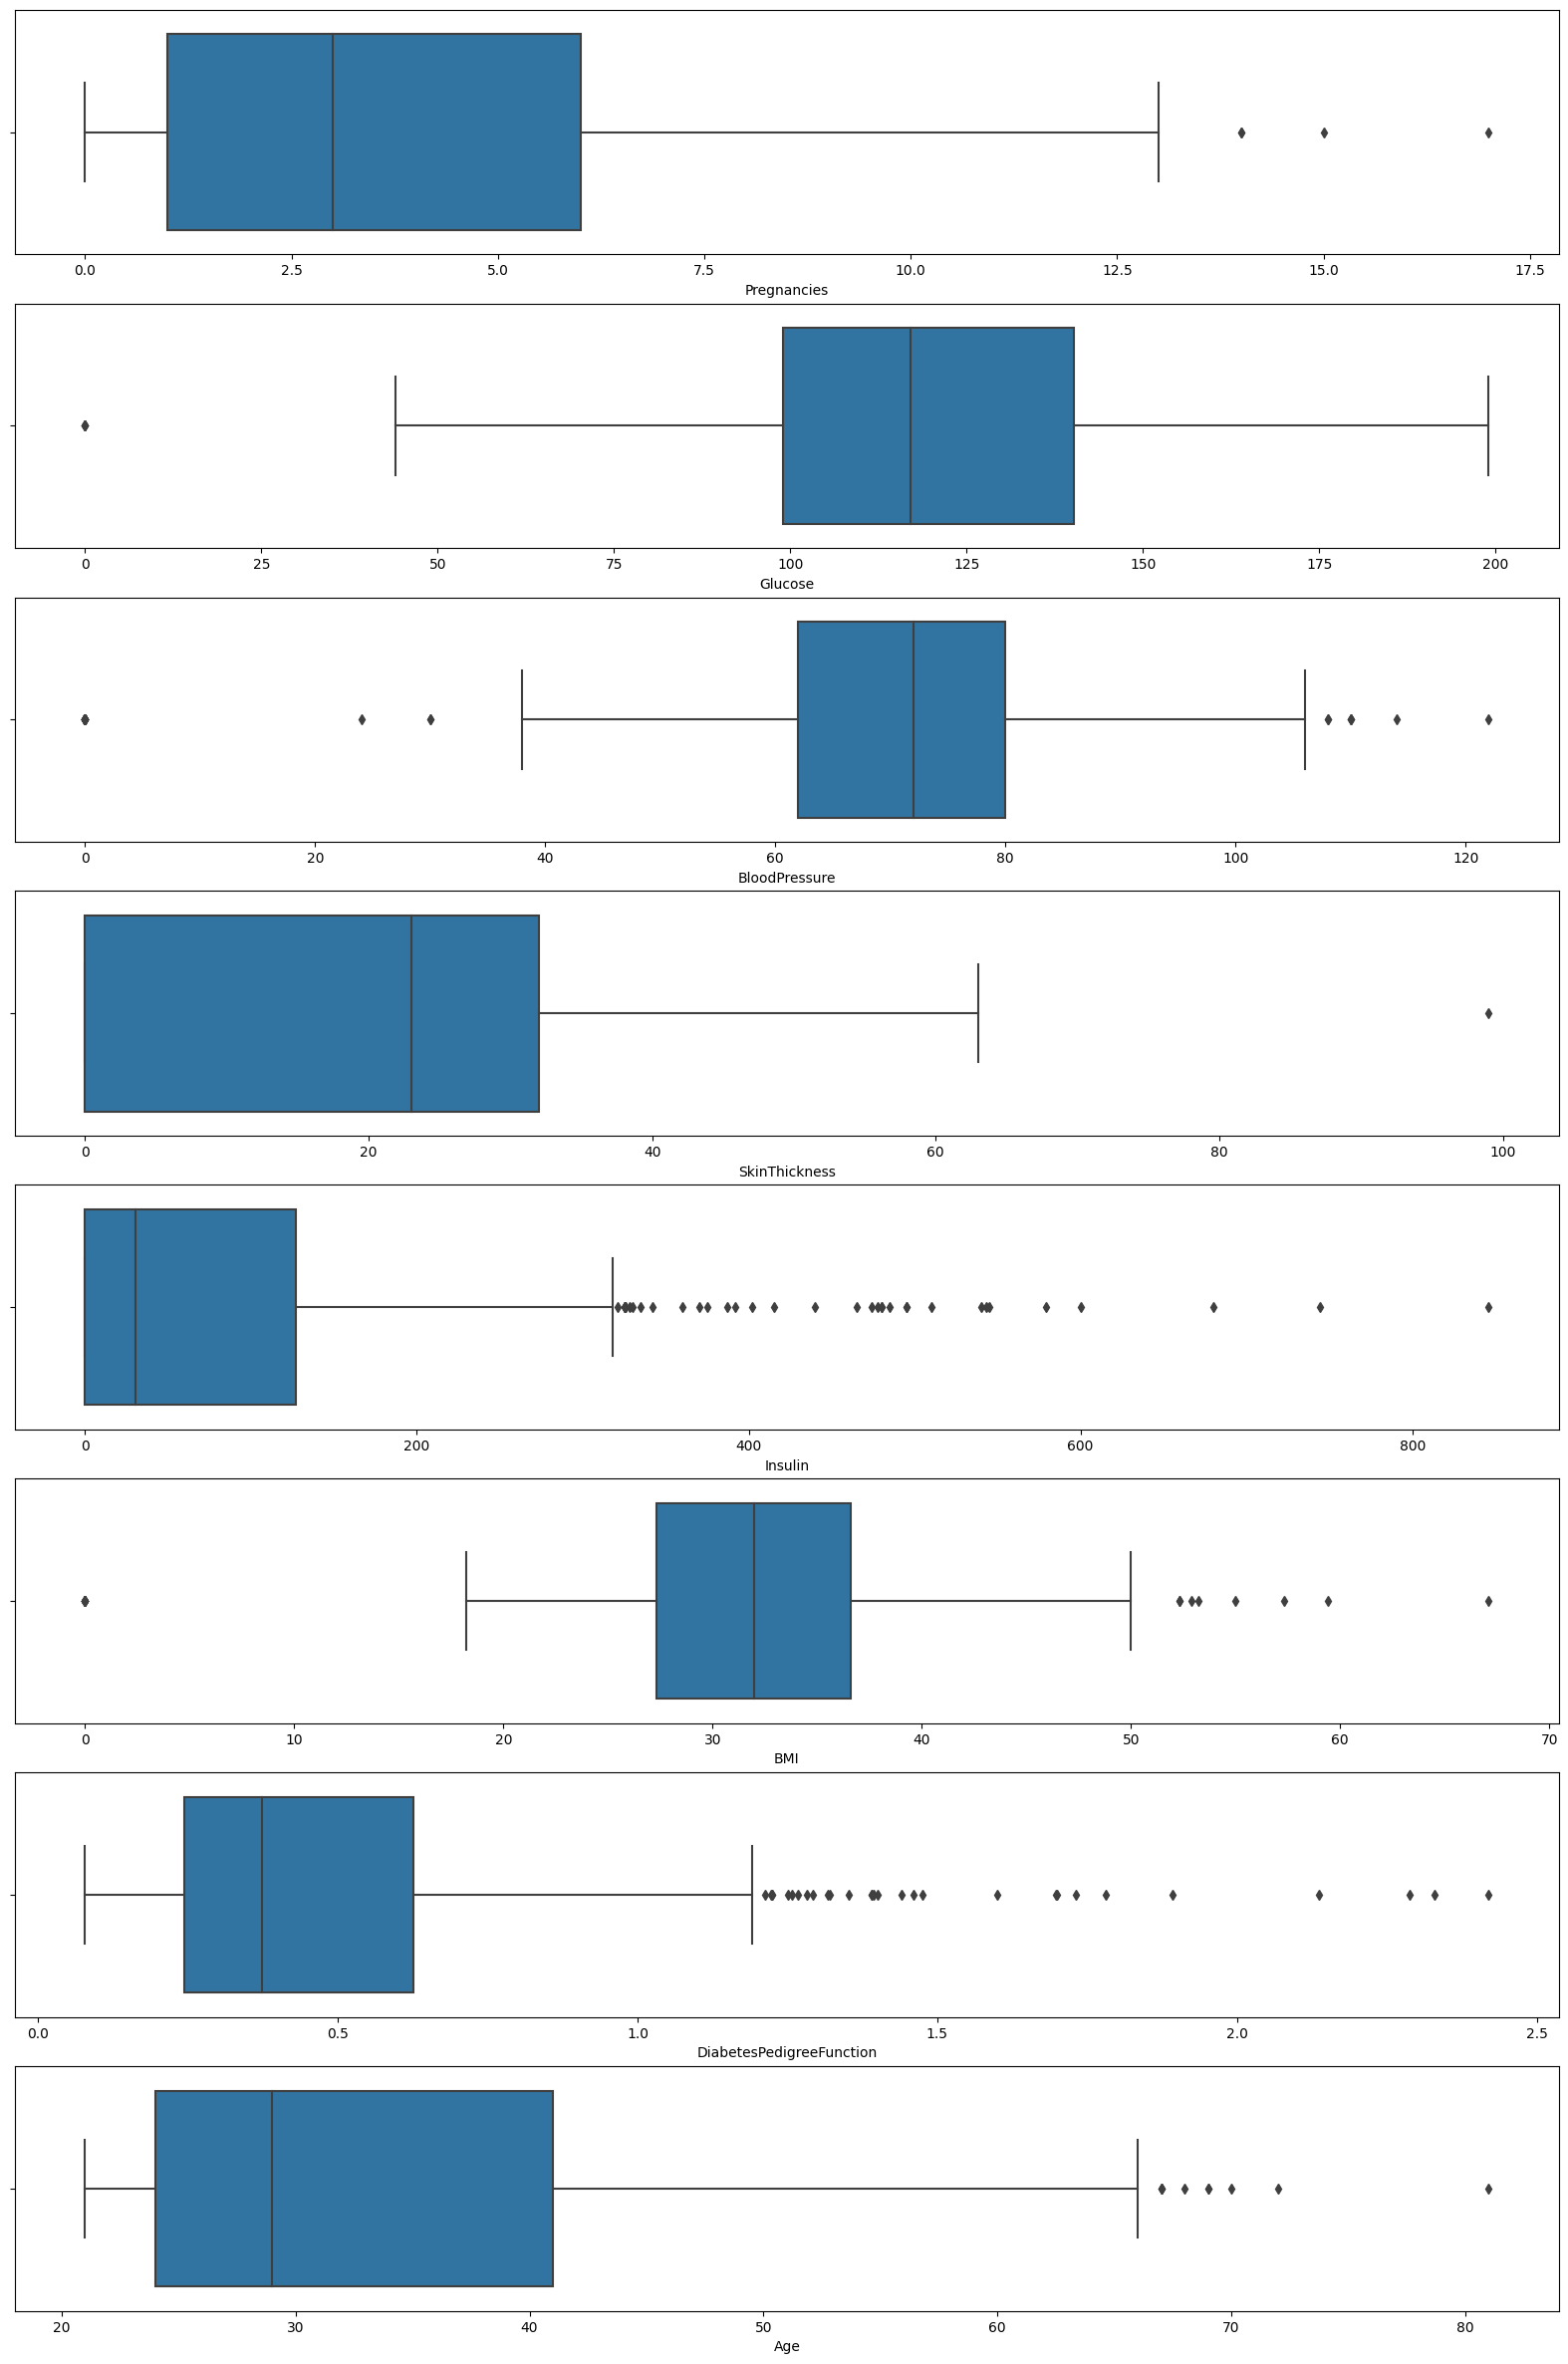

In [19]:
f, axes = plt.subplots(8, 1, figsize=(20, 30))
for ax, feature in zip(axes.flat, num_cols):
    sns.boxplot(x = df[feature], ax=ax)


In [14]:
q1, q3 = np.quantile(df["Insulin"],[0.25,0.75])
iqr = q3 - q1
max_ = q3 + 1.5*iqr
max_

318.125

In [15]:
df[df["Insulin"] > max_].shape

(34, 9)

In [16]:
q1, q3 = np.quantile(df["BloodPressure"],[0.25,0.75])
iqr = q3 - q1
max_ = q3 + 1.5*iqr
min_ = q1 - 1.5*iqr
df[(df["BloodPressure"] > max_) | (df["BloodPressure"] < min_)].shape

## Blood Pressure cant be zero so we will impute it with some meaningful value

(45, 9)

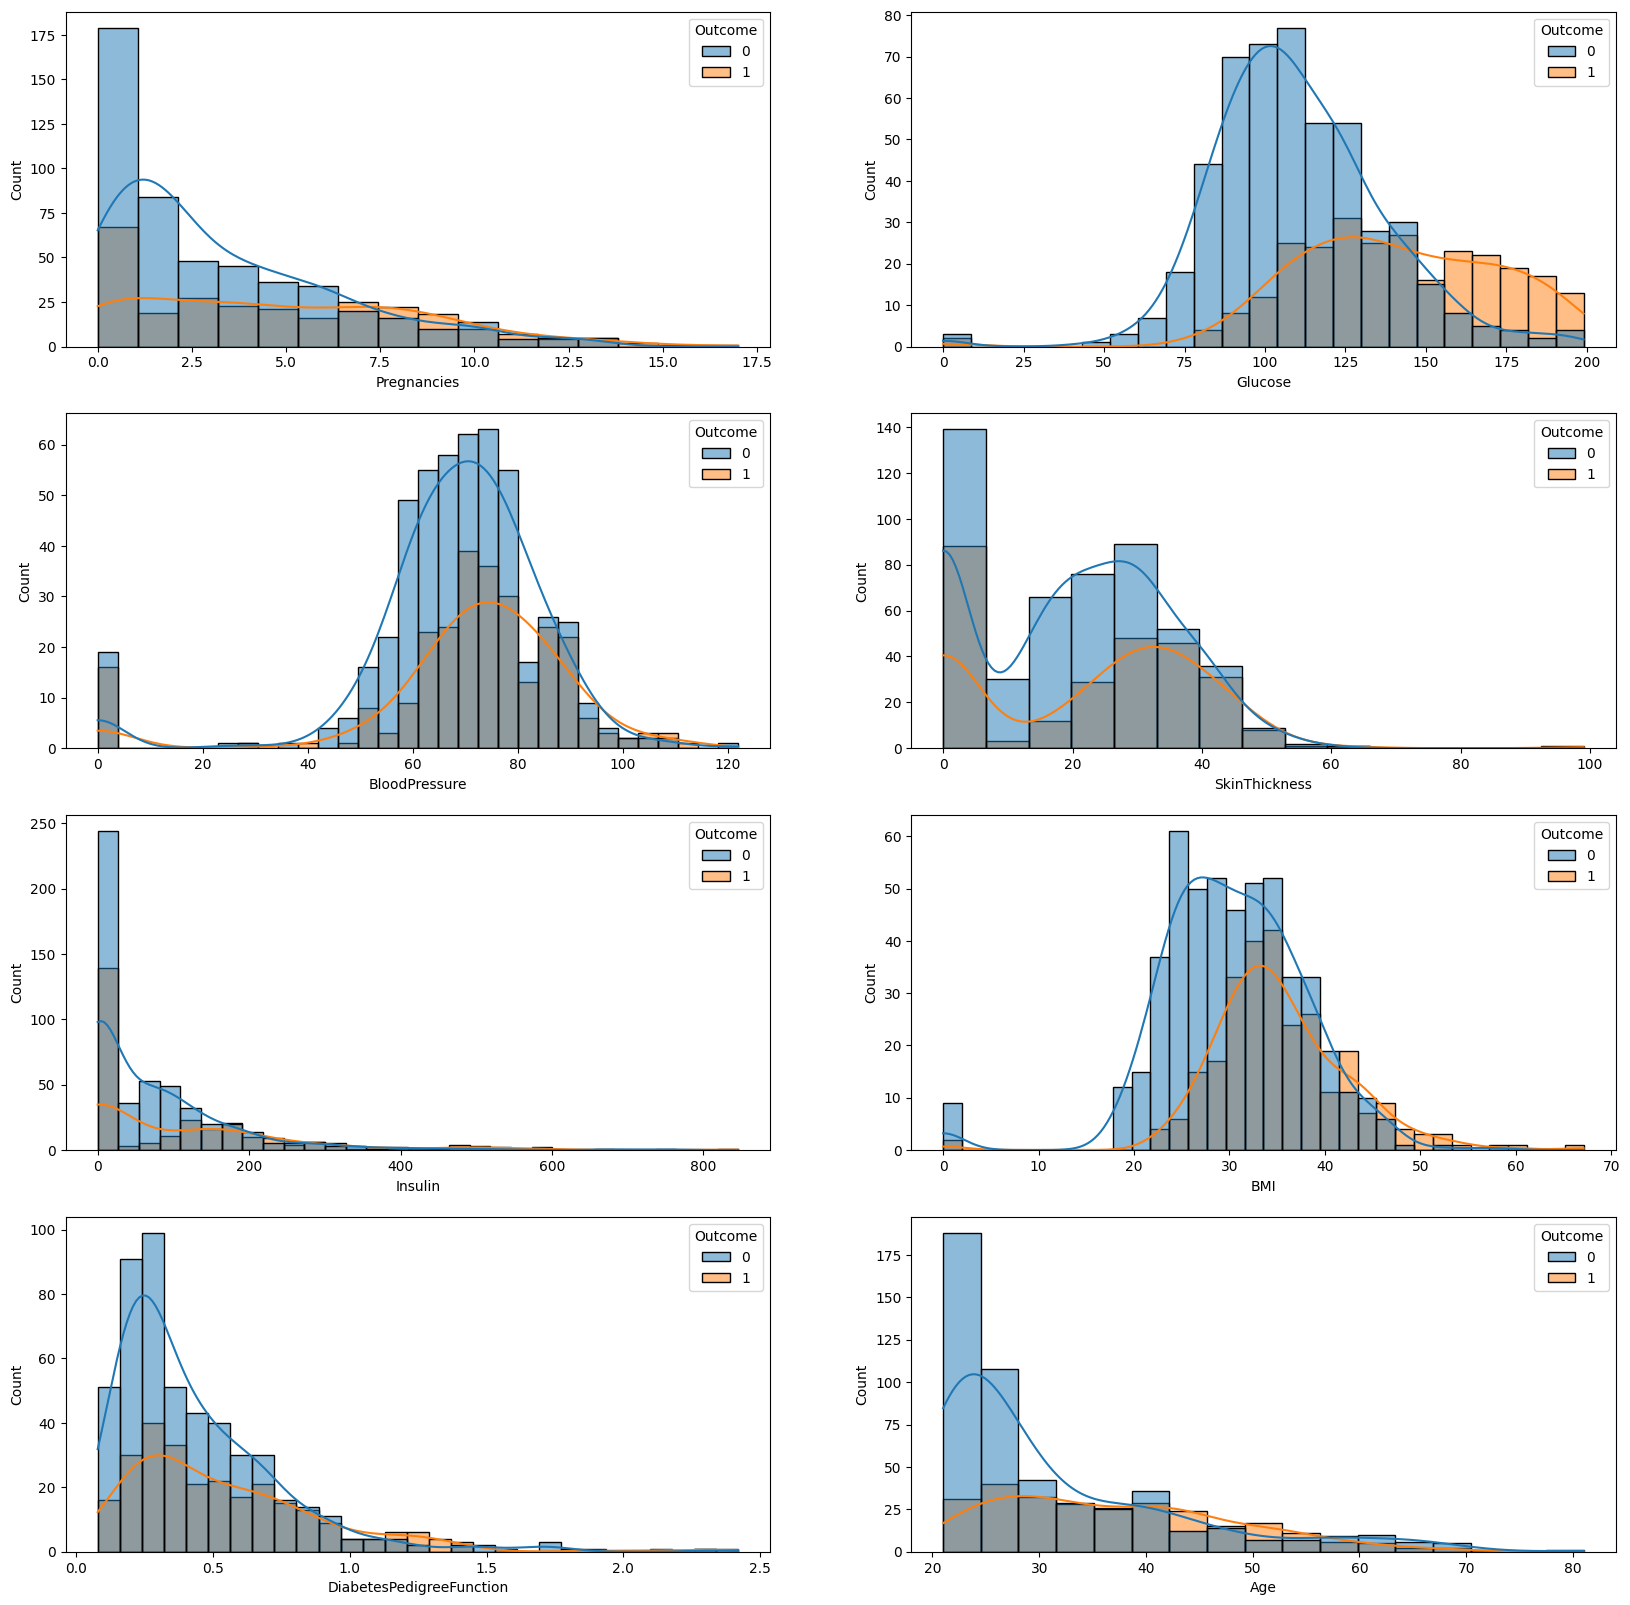

In [20]:
f, axes = plt.subplots(4, 2, figsize=(20, 20))
for ax, feature in zip(axes.flat, num_cols):
    sns.histplot(data = df,x = feature , color="skyblue", ax=ax, kde=True, hue = "Outcome")

C:\Users\Tushar\AppData\Local\Temp\ipykernel_12996\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

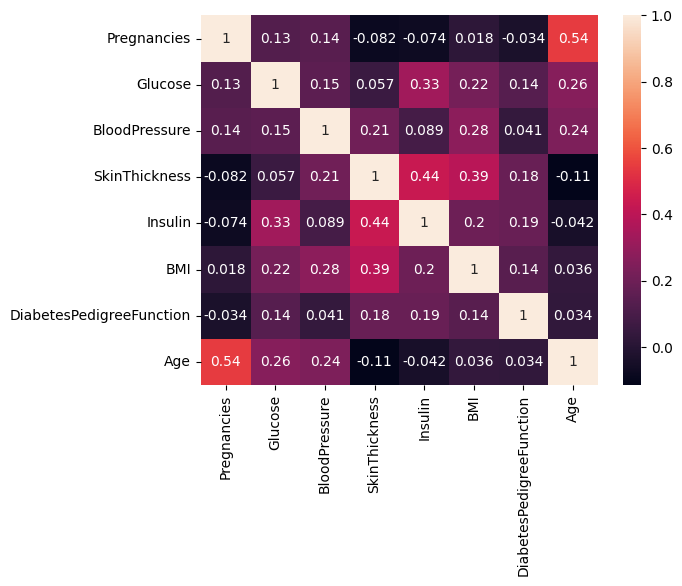

In [18]:
sns.heatmap(df.corr(), annot=True)

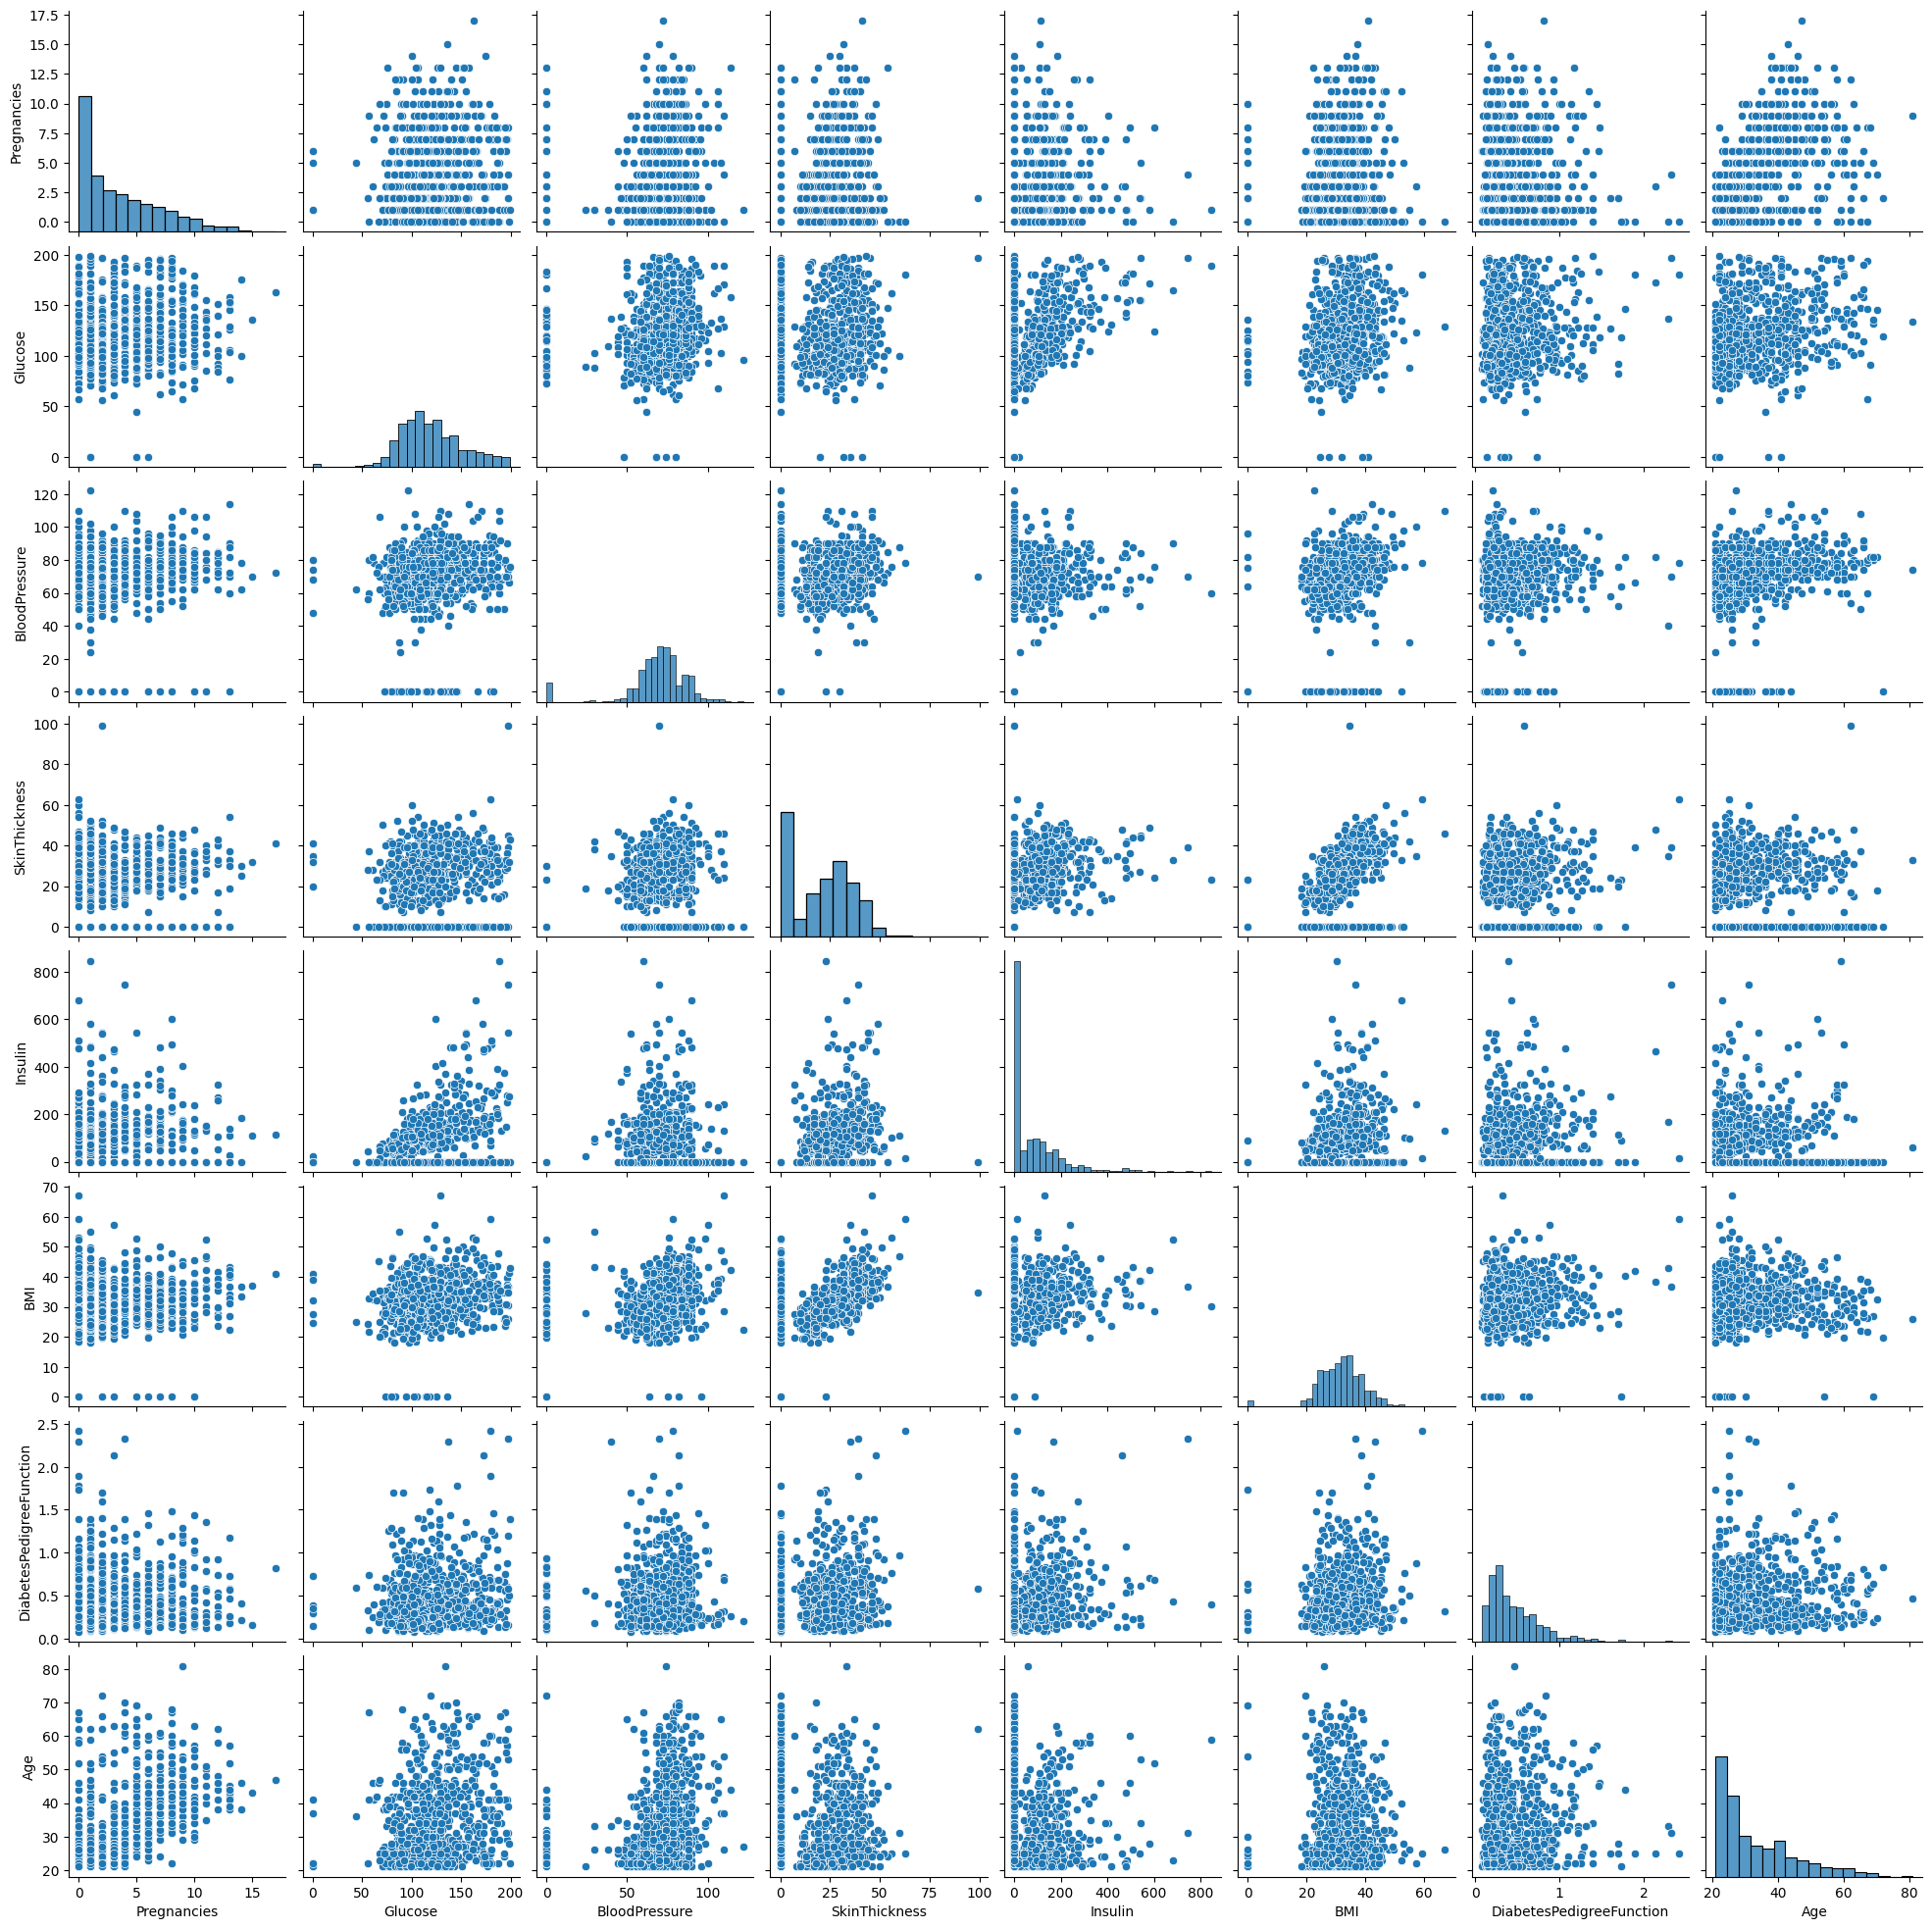

In [19]:
sns.pairplot(df)

In [20]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split



In [21]:
X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)



(614, 8) (154, 8) (614,) (154,)


In [22]:
model = DecisionTreeClassifier()
model



DecisionTreeClassifier()

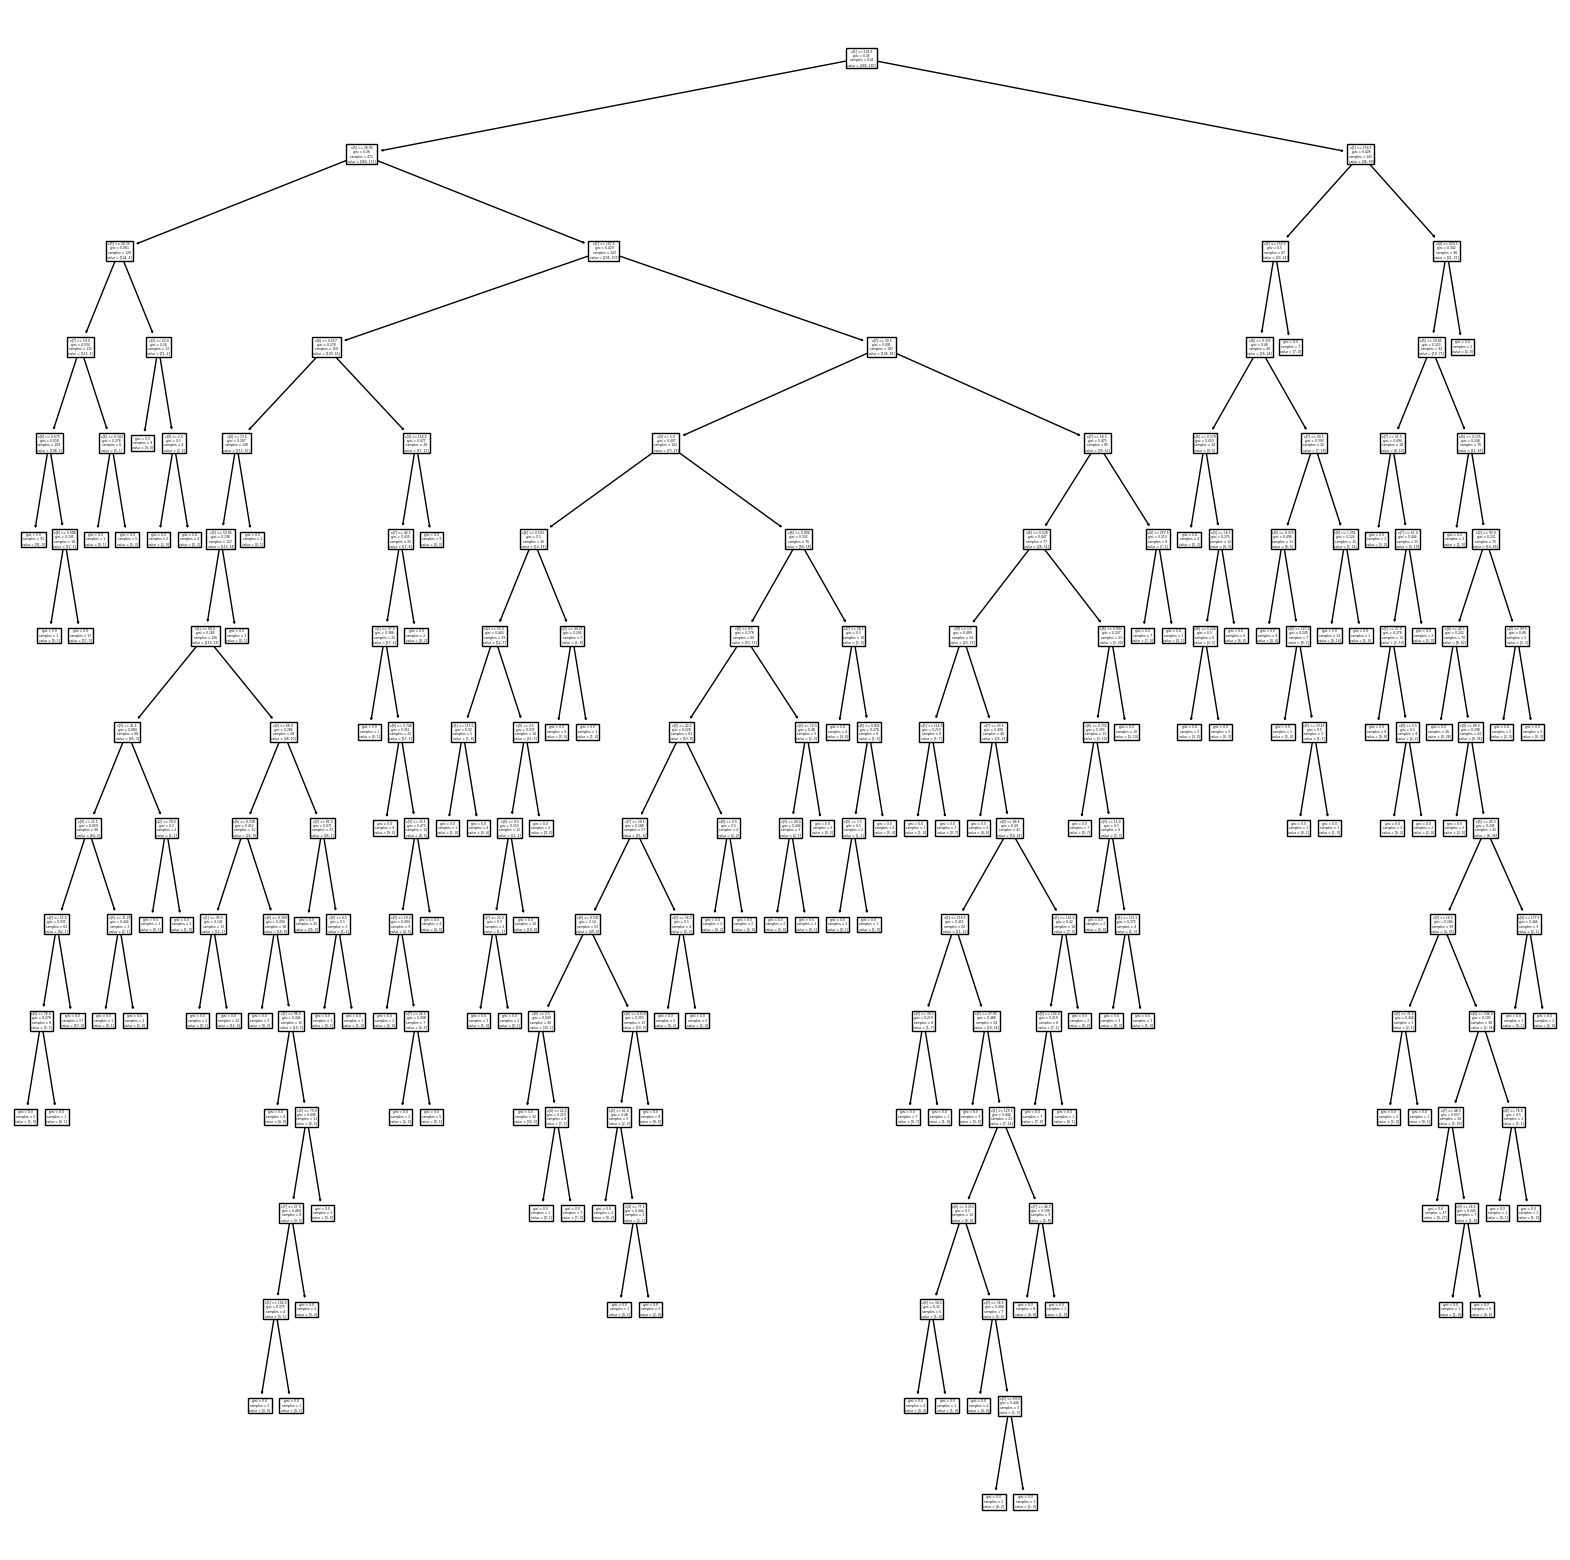

In [23]:
model.fit(x_train,y_train)

plt.figure(figsize = (20,20))
plot_tree(model)
plt.show()



In [24]:
preds = model.predict(x_test)
accuracy_score(y_test, preds)*100

75.32467532467533

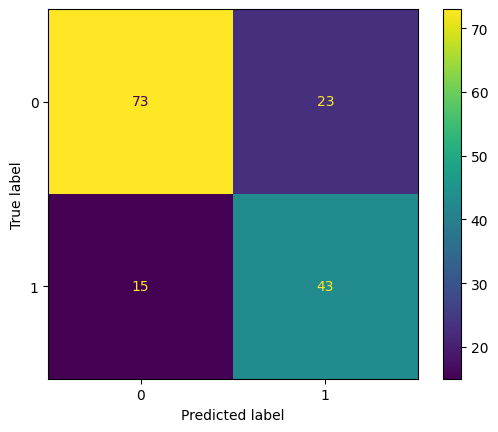

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()


In [26]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        96
           1       0.65      0.74      0.69        58

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.76      0.75      0.76       154



# Hyperparameter Tuning

In [27]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier()

In [28]:
parameters = {"criterion" : ["gini","entropy","log_loss"],
              "max_depth" : range(1,20),
              "min_samples_leaf": range(1, 9)}

clf = GridSearchCV(dt, parameters, scoring=accuracy_score, cv=7, n_jobs=-1)

In [29]:
clf.fit(x_train, y_train)

c:\Users\Tushar\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 20),
                         'min_samples_leaf': range(1, 9)},
             scoring=<function accuracy_score at 0x0000018FCDA5FA60>)

In [30]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=1)

In [31]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}

In [32]:
best_model = DecisionTreeClassifier(max_depth=1)

In [33]:
best_model.fit(x_train,y_train)
y_pred = best_model.predict(x_test)

accuracy_score(y_test, y_pred)

0.7597402597402597

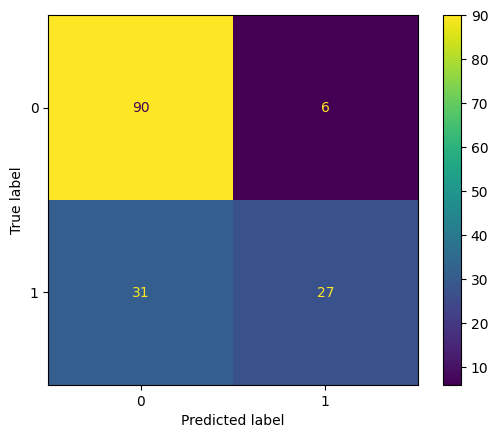

In [34]:
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_model.classes_)
disp.plot()

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83        96
           1       0.82      0.47      0.59        58

    accuracy                           0.76       154
   macro avg       0.78      0.70      0.71       154
weighted avg       0.77      0.76      0.74       154



In [36]:
y = y_test.values
y

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
      dtype=int64)

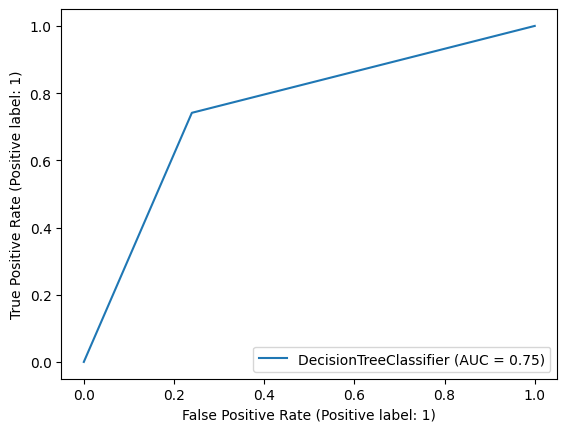

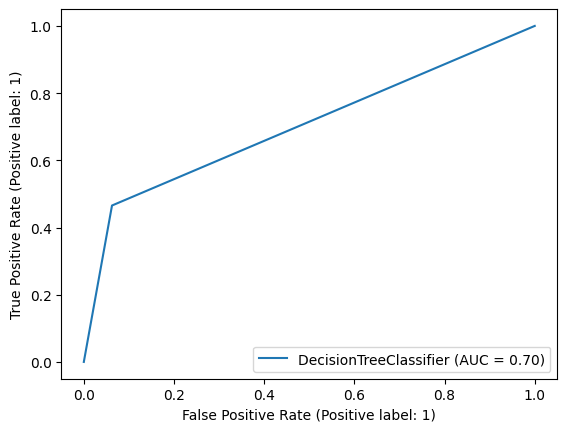

In [37]:
from sklearn.metrics import RocCurveDisplay, roc_curve


prob = best_model.predict_proba(x_test)

fpr, tpr, thresholds = roc_curve(y, y_pred, pos_label=1)
RocCurveDisplay.from_estimator(model, x_test, y_test)
RocCurveDisplay.from_estimator(best_model, x_test, y_test)

[Text(0.5, 0.75, 'x[1] <= 143.5\ngini = 0.45\nsamples = 614\nvalue = [404, 210]'),
 Text(0.25, 0.25, 'gini = 0.36\nsamples = 471\nvalue = [360, 111]'),
 Text(0.75, 0.25, 'gini = 0.426\nsamples = 143\nvalue = [44, 99]')]

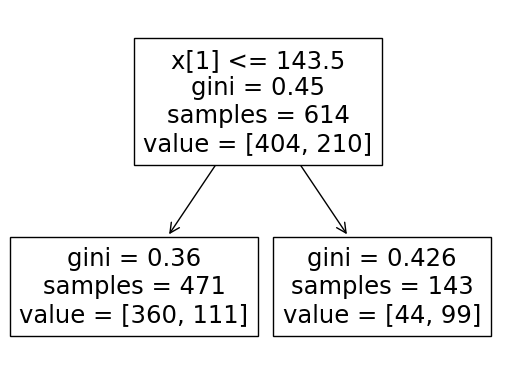

In [38]:
plot_tree(best_model)